In [29]:
""" You must rename the folder containing the csv's to \'data\' """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [45]:
wellness = pd.read_csv(filepath_or_buffer='./data/wellness.csv')
gps = pd.read_csv(filepath_or_buffer='./data/gps.csv')
games = pd.read_csv(filepath_or_buffer='./data/games.csv')
rpe = pd.read_csv(filepath_or_buffer='./data/rpe.csv')

In [13]:
wellness.Date = pd.to_datetime(wellness.Date, format="%Y-%m-%d")

In [17]:
date_wellness = wellness.set_index(['Date','PlayerID'])
date_wellness.head(5)

Fatigue  Soreness  Desire  Irritability   BedTime  \
Date       PlayerID                                                      
2018-07-21 1               3         3       2             3  23:00:00   
           2               4         3       4             4  23:00:00   
           3               3         3       5             4  22:30:00   
           4               2         3       5             4  00:30:00   
           5               5         3       4             4  23:45:00   

                     WakeTime  SleepHours  SleepQuality  MonitoringScore Pain  \
Date       PlayerID                                                             
2018-07-21 1         07:00:00        8.00             2               13   No   
           2         07:00:00        8.00             4               19  Yes   
           3         06:30:00        8.00             4               19   No   
           4         07:00:00        6.50             1               15   No   
           5         07:00:00        7.25             4               20   No   

                    Illness Menstruation  Nutrition NutritionAdjustment  \
Date       PlayerID                                                       
2018-07-21 1             No          Yes  Excellent                 Yes   
           2             No          Yes        NaN                 NaN   
           3             No           No        NaN                 NaN   
           4             No          Yes  Excellent                 Yes   
           5             No           No       Okay                 Yes   

                    USGMeasurement    USG TrainingReadiness  
Date       PlayerID                                          
2018-07-21 1                    No    NaN                0%  
           2                   Yes  1.010                0%  
           3                   Yes  1.016              100%  
           4                   Yes  1.025               95%  
           5                   Yes  1.022              100%

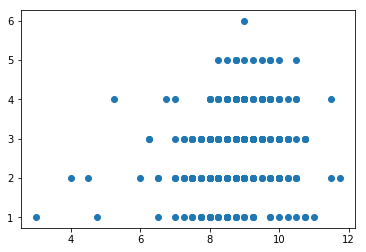

In [44]:
player_wellness = date_wellness.swaplevel().sort_index()
plt.scatter(player_wellness.loc[1].SleepHours.values, player_wellness.loc[1].Fatigue.values)


In [86]:
summation = 0
for item in gps.groupby('GameID').PlayerID.unique():
    summation += len(item)
    
print(summation)

448


In [85]:
max([len(groups) for groups in gps.groupby('GameID').groups.values()])

189107

In [87]:
tsne_mat = np.zeros((448,189107))

(189107, 448)